In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
train =pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/training_set.csv')

In [4]:
train.drop('Id',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [6]:
train['PoolQC']=train['PoolQC'].fillna('No_Pool')
train['MiscFeature']=train['MiscFeature'].fillna('No_MiscFeature')
train['Alley']=train['Alley'].fillna('No_Alley')
train['Fence']=train['Fence'].fillna('No_Fence')
train['FireplaceQu']=train['FireplaceQu'].fillna('No_FireplaceQu')

In [7]:
train['FireplaceQu'].value_counts()

No_FireplaceQu    690
Gd                380
TA                313
Fa                 33
Ex                 24
Po                 20
Name: FireplaceQu, dtype: int64

In [8]:
train.isna().sum().sort_values(ascending=False).head(20)

LotFrontage     259
GarageFinish     81
GarageCond       81
GarageYrBlt      81
GarageQual       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
BsmtHalfBath      0
BsmtFullBath      0
FireplaceQu       0
Fireplaces        0
FullBath          0
Functional        0
dtype: int64

In [9]:
dftr=train.drop(['Id'],axis=1)

In [10]:
for i in dftr:
    if(dftr[i].dtypes=='object'):
        c=dftr[i].mode()[0]
        dftr[i]=dftr[i].fillna(c)         
    else:
        c=dftr[i].mean()
        dftr[i]=dftr[i].fillna(c)  

In [11]:
cat=[]
con=[]
for i in dftr:
    if(dftr[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [12]:
(dftr[con]==0).sum().sort_values(ascending=False)

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageArea         81
GarageCars         81
TotalBsmtSF        37
FullBath            9
BedroomAbvGr        6
KitchenAbvGr        1
MoSold              0
YrSold              0
MSSubClass          0
GarageYrBlt         0
TotRmsAbvGrd        0
LotFrontage         0
GrLivArea           0
1stFlrSF            0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
OverallQual         0
LotArea             0
SalePrice           0
dtype: int64

con

for i in con:
    sb.histplot(dftr[i])
    plt.show()

for i in con:
    sb.histplot(np.log(dftr2[i]))
    plt.show()

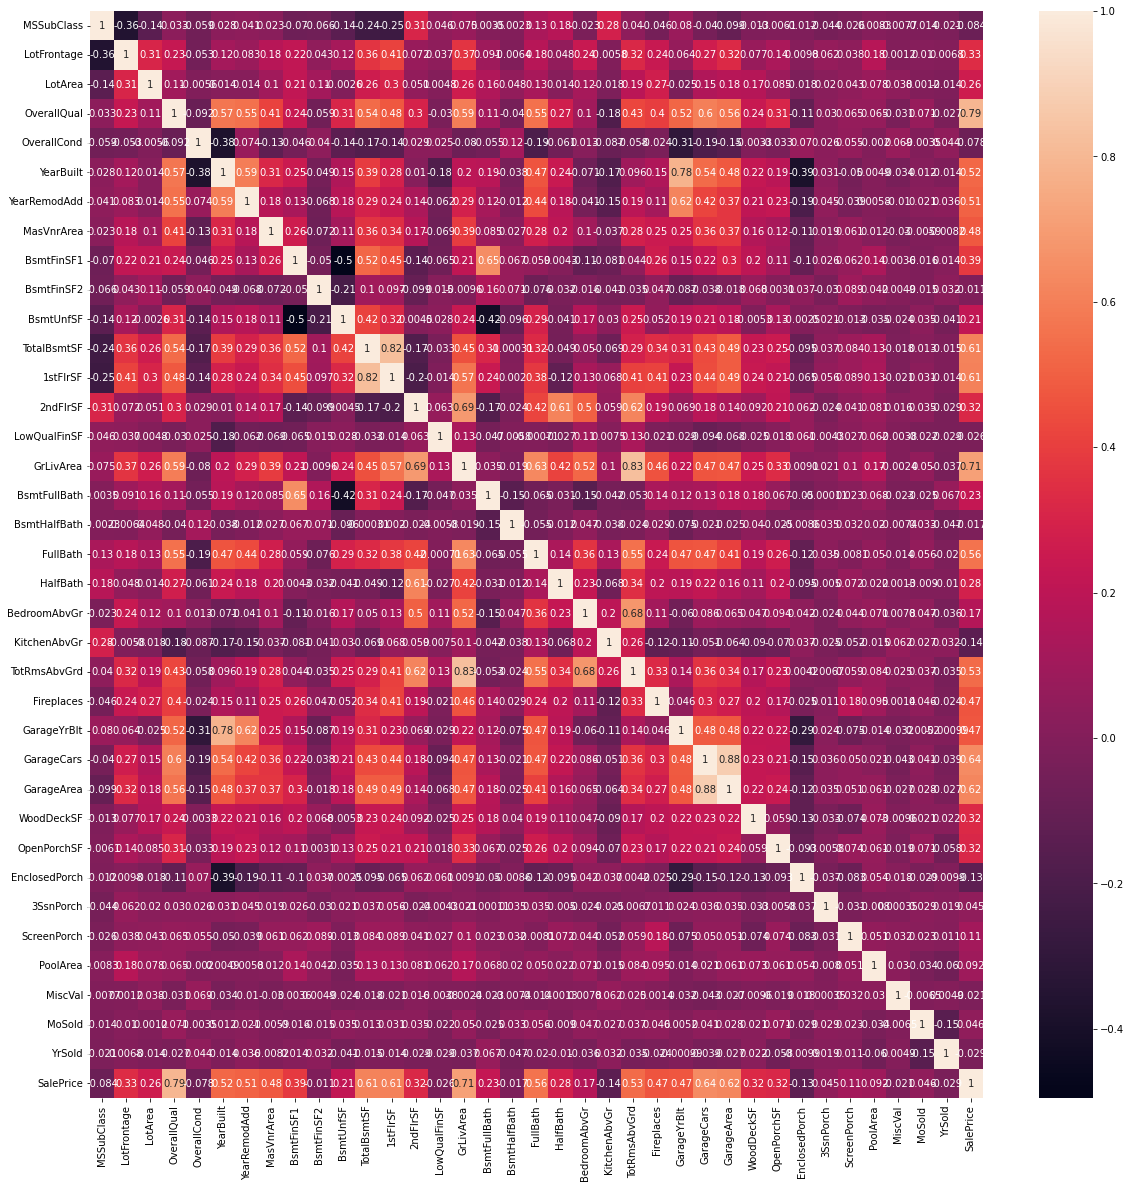

In [21]:
plt.figure(figsize=(20,20))
sb.heatmap(dftr.corr(),annot=True)
plt.show()

In [22]:
dftr.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [23]:
x=dftr.drop('SalePrice',axis=1)
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,0,No_Pool,MnPrv,No_MiscFeature,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,0,No_Pool,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,0,No_Pool,No_Fence,No_MiscFeature,0,4,2010,WD,Normal


In [24]:
y=dftr[['SalePrice']]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [27]:
con.remove('SalePrice')

In [33]:
xcat=pd.DataFrame(x[cat])
xcat=pd.get_dummies(xcat)

In [34]:
xcat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No_Alley,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
xcon=pd.DataFrame(x[con])
xcon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [36]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
xcon=pd.DataFrame(mm.fit_transform(xcon),columns=con)

In [37]:
xcon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [39]:
x=pd.concat([xcon,xcat],axis=1)

In [40]:
x.shape

(1460, 293)

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [44]:
nn=Sequential()
nn.add(Dense(200,input_dim=(293)))
nn.add(Dropout(0.1))

nn.add(Dense(200))
nn.add(Dropout(0.2))

nn.add(Dense(200))
nn.add(Dropout(0.2))

nn.add(Dense(1))


In [45]:
nn.compile(loss='mean_absolute_error')
model=nn.fit(xtrain,ytrain)

37/37 [==============================] - 2s 6ms/step - loss: 175414.2188


In [46]:
from sklearn.metrics import mean_squared_error
pred_tr=nn.predict(xtrain)
pred_ts=nn.predict(xtest)
tr_err=mean_squared_error(ytrain,pred_tr)
ts_err=mean_squared_error(ytest,pred_ts)

In [47]:
np.sqrt(tr_err)

177300.46422872448

In [48]:
np.sqrt(ts_err)

178003.5810495035

In [49]:
nn1=Sequential()
nn1.add(Dense(200,input_dim=(293)))

nn1.add(Dense(200))
nn1.add(Dropout(0.2))

nn1.add(Dense(200))
nn1.add(Dropout(0.2))

nn1.add(Dense(1))

In [50]:
nn1.compile(loss='mean_absolute_error')
nn1.fit(xtrain,ytrain,validation_split=0.2,batch_size=70,epochs=1000)

Epoch 1/1000
14/14 [==============================] - 2s 32ms/step - loss: 180184.8906 - val_loss: 181319.4219
Epoch 2/1000
14/14 [==============================] - 0s 10ms/step - loss: 175557.3750 - val_loss: 172491.8281
Epoch 3/1000
14/14 [==============================] - 0s 11ms/step - loss: 162281.7500 - val_loss: 152949.4531
Epoch 4/1000
14/14 [==============================] - 0s 12ms/step - loss: 136684.2344 - val_loss: 118796.5859
Epoch 5/1000
14/14 [==============================] - 0s 14ms/step - loss: 95584.0156 - val_loss: 71224.0391
Epoch 6/1000
14/14 [==============================] - 0s 12ms/step - loss: 56885.5859 - val_loss: 50096.4023
Epoch 7/1000
14/14 [==============================] - 0s 12ms/step - loss: 48367.4961 - val_loss: 47195.4414
Epoch 8/1000
14/14 [==============================] - 0s 12ms/step - loss: 45276.7383 - val_loss: 44998.5430
Epoch 9/1000
14/14 [==============================] - 0s 12ms/step - loss: 42849.5039 - val_loss: 42754.1992
Epoch 10/10

In [51]:
from sklearn.metrics import mean_squared_error
pred_tr=nn1.predict(xtrain)
pred_ts=nn1.predict(xtest)
tr_err=mean_squared_error(ytrain,pred_tr)
ts_err=mean_squared_error(ytest,pred_ts)

In [52]:
np.sqrt(tr_err)

24712.271956169196

In [53]:
np.sqrt(ts_err)

34215.8633740474

In [54]:
import keras_tuner as kt
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(200,input_dim=(293)))
    nn.add(Dropout(0.1))
    y = hp.Choice("units",values=[30,50,100,200,300])
    nn.add(Dense(units=y))
    x = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nn.add(Dropout(rate=x))
    nn.add(Dense(1))
    nn.compile(loss='mean_squared_error',metrics='mse')
    return nn

In [82]:
tuner = kt.Hyperband(model_builder,
             objective='val_mse',
             max_epochs=50,
             directory="C:/Users/cmscomputers/Downloads/Skype/NN5",
             project_name="Tuner")

In [83]:
tuner.search(xtrain,ytrain,epochs=300,validation_split=0.2)

Trial 60 Complete [00h 00m 04s]
val_mse: 36750671872.0

Best val_mse So Far: 1596961792.0
Total elapsed time: 00h 04m 29s
INFO:tensorflow:Oracle triggered exit


In [87]:
best = tuner.get_best_hyperparameters(num_trials=60)[0]

In [88]:
best.get("rate")

0.4

In [89]:
best.get("units")

300

In [90]:
nn1=Sequential()
nn1.add(Dense(300,input_dim=(293)))

nn1.add(Dense(300))
nn1.add(Dropout(0.4))

nn1.add(Dense(300))
nn1.add(Dropout(0.4))

nn1.add(Dense(1))

In [91]:
nn1.compile(loss='mean_absolute_error')
nn1.fit(xtrain,ytrain,validation_split=0.2,batch_size=70,epochs=100)

Epoch 1/100
14/14 [==============================] - 2s 32ms/step - loss: 179390.7812 - val_loss: 177517.5938
Epoch 2/100
14/14 [==============================] - 0s 13ms/step - loss: 165049.4062 - val_loss: 149894.6719
Epoch 3/100
14/14 [==============================] - 0s 14ms/step - loss: 123626.4375 - val_loss: 90341.8047
Epoch 4/100
14/14 [==============================] - 0s 15ms/step - loss: 64511.5547 - val_loss: 50671.3203
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 48027.8203 - val_loss: 46126.7852
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 44817.4180 - val_loss: 42830.2695
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 41535.6406 - val_loss: 41475.9023
Epoch 8/100
14/14 [==============================] - 0s 13ms/step - loss: 38797.8633 - val_loss: 37618.9844
Epoch 9/100
14/14 [==============================] - 0s 13ms/step - loss: 36341.6094 - val_loss: 35988.3945
Epoch 10/100
14/14 [===

In [92]:
from sklearn.metrics import mean_squared_error
pred_tr=nn1.predict(xtrain)
pred_ts=nn1.predict(xtest)
tr_err=mean_squared_error(ytrain,pred_tr)
ts_err=mean_squared_error(ytest,pred_ts)

In [93]:
np.sqrt(tr_err)

27245.883689837112

In [94]:
np.sqrt(ts_err)

33209.406483263054

# preparing test data

In [95]:
test=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/testing_set.csv')

In [96]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [97]:
dfts=test.drop(['Id'],axis=1)

In [98]:
dfts['PoolQC']=dfts['PoolQC'].fillna('No_Pool')
dfts['MiscFeature']=dfts['MiscFeature'].fillna('No_MiscFeature')
dfts['Alley']=dfts['Alley'].fillna('No_Alley')
dfts['Fence']=dfts['Fence'].fillna('No_Fence')
dfts['FireplaceQu']=dfts['FireplaceQu'].fillna('No_FireplaceQu')

In [99]:
for i in dfts:
    if(dfts[i].dtypes=='object'):
        c=dfts[i].mode()[0]
        dfts[i]=dfts[i].fillna(c)         
    else:
        c=dfts[i].mean()
        dfts[i]=dfts[i].fillna(c)  

In [100]:
cats=[]
cons=[]
for i in dfts:
    if(dfts[i].dtypes=='object'):
        cats.append(i)
    else:
        cons.append(i)

In [103]:
tcats=pd.DataFrame(pd.get_dummies(dfts[cats]))

In [105]:
tcons=pd.DataFrame(mm.fit_transform(dfts[cons]),columns=cons)

In [106]:
t=pd.concat([tcons,tcats],axis=1)

In [107]:
t.shape

(1459, 275)

In [111]:
col=x.columns

In [112]:
t[col]

KeyError: "['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC'] not in index"

result=nn1.predict(dfts)
result

In [113]:
col3=['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']

In [ ]:
len(col3)

In [114]:
t[col3]=0

In [115]:
t.shape

(1459, 293)

In [116]:
result=nn1.predict(t)
result

array([[144097.34 ],
       [126929.99 ],
       [167160.39 ],
       ...,
       [180084.67 ],
       [ 96336.875],
       [176202.62 ]], dtype=float32)

In [142]:
sale=pd.DataFrame(result,columns=['Sale_price'])

In [143]:
sale

,Sale_price
0,144097.343750
1,126929.992188
2,167160.390625
3,172023.234375
4,147100.859375
...,...
1454,109751.148438
1455,115593.546875
1456,180084.671875
1457,96336.875000


In [144]:
price=test[['Id']]

In [145]:
price['Sale_Price']=sale

In [146]:
price

,Id,Sale_Price
0,1461,144097.343750
1,1462,126929.992188
2,1463,167160.390625
3,1464,172023.234375
4,1465,147100.859375
...,...,...
1454,2915,109751.148438
1455,2916,115593.546875
1456,2917,180084.671875
1457,2918,96336.875000


In [147]:
price.to_csv('House_price',index=False)